Epoch 1/700
16/16 [==============================] - 1s 16ms/step - loss: 0.6568 - accuracy: 0.6424 - val_loss: 0.6535 - val_accuracy: 0.6446
Epoch 2/700
16/16 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.6736 - val_loss: 0.6445 - val_accuracy: 0.6446
Epoch 3/700
16/16 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.6674 - val_loss: 0.6392 - val_accuracy: 0.6281
Epoch 4/700
16/16 [==============================] - 0s 5ms/step - loss: 0.6172 - accuracy: 0.6840 - val_loss: 0.6327 - val_accuracy: 0.6198
Epoch 5/700
16/16 [==============================] - 0s 5ms/step - loss: 0.6127 - accuracy: 0.6881 - val_loss: 0.6309 - val_accuracy: 0.6198
Epoch 6/700
16/16 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.6861 - val_loss: 0.6268 - val_accuracy: 0.6446
Epoch 7/700
16/16 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.6902 - val_loss: 0.6246 - val_accuracy: 0.6281
Epoch 8/700


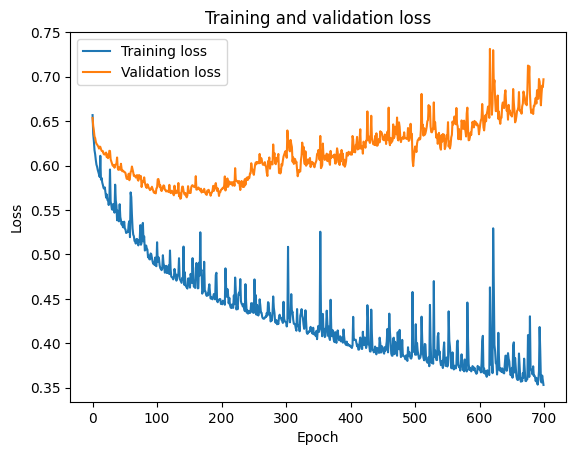

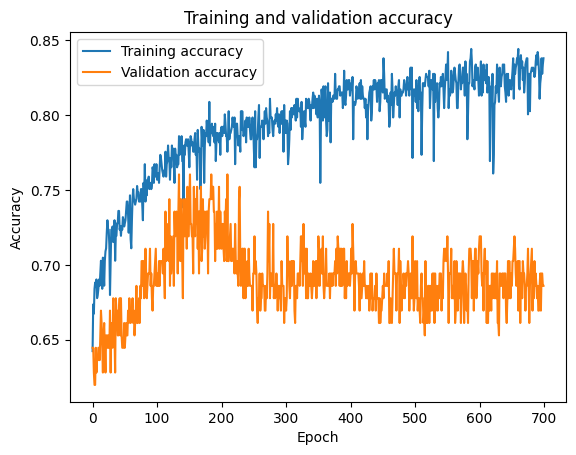

No overfitting detected.


In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('A.csv')

# Split the data into inputs (X) and targets (y)
X = data.drop(columns=['Solubility'])
y = data['Solubility']

# Split the data into training and testing sets
X_train = X[:-119]
y_train = y[:-119]
X_test = X[-119:]
y_test = y[-119:]

# Reshape the input data to work with the CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=500)

# Train the model with the corrected data
history = model.fit(X_train_reshaped, y_train, epochs=700, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Check for overfitting
if len(history.history['val_loss']) > 10 and all(val_loss > history.history['val_loss'][-1] for val_loss in history.history['val_loss'][-10:-1]):
    print("Overfitting detected!")
else:
    print("No overfitting detected.")


In [ ]:
import pandas as pd

# Convert predicted labels to binary (0 or 1)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convert y_test to a NumPy array and reshape it
y_test_np = y_test.to_numpy().reshape(-1)

# Create a DataFrame with predicted labels and original values
prediction_df = pd.DataFrame({'Predictions': y_pred_binary.reshape(-1), 'Original Values': y_test_np})

# Save the DataFrame as an Excel file
prediction_df.to_excel('predictions.xlsx', index=False)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert predicted probabilities to binary labels using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert predicted probabilities to binary labels using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Compute and print accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict labels for the training data
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5) # Convert probabilities to binary predictions

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(cm_train)

# Calculate accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy Score for Training Data:", accuracy_train)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Training Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)

# Convert Series to a Numpy array and flatten it
y_train_flat = y_train.to_numpy().flatten()

# Create a DataFrame to store original values and predictions
train_data_predictions = pd.DataFrame({'Original Values': y_train_flat, 'Predictions': y_train_pred.flatten()})


In [ ]:
# Set display options to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the table with original values and predictions
print("Table with Original Values and Predictions for Training Data:")
print(train_data_predictions)

# Convert train_data_predictions to an Excel file
train_data_predictions.to_excel('train_data_predictions.xlsx', index=False)
print("train_data_predictions has been saved to train_data_predictions.xlsx")
